Source: http://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_twoclass.html

In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_gaussian_quantiles
import warnings
warnings.filterwarnings('ignore')

### Create dataset

In [4]:
X1, y1 = make_gaussian_quantiles(cov=2.,
                                 n_samples=200, n_features=2,
                                 n_classes = 2, random_state=1)
X2, y2 = make_gaussian_quantiles(mean=(3,3), cov=1.5,
                                 n_samples=300, n_features=2,
                                 n_classes=2, random_state=1)

X = np.concatenate((X1,X2))
y = np.concatenate((y1, - y2 + 1))

### Create and fit model

In [5]:
bdt = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=200)
bdt.fit(X, y)

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best'),
          learning_rate=1.0, n_estimators=200, random_state=None)

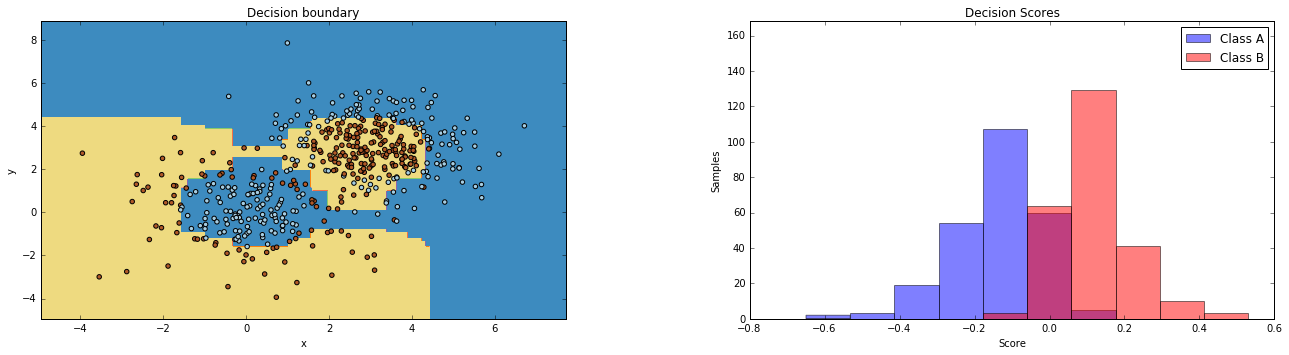

In [18]:
plot_colors = "br"
plot_step = 0.02
class_names = "AB"
plt.figure(figsize=(16,5))
plt.subplot(121)
x_min, x_max = X[:, 0].min() -1, X[:,0].max() + 1
y_min, y_max = X[:,1].min() -1, X[:,1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                     np.arange(y_min, y_max, plot_step))

Z = bdt.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
plt.axis("tight")

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.ylim([y_min, y_max])
plt.xlim([x_min, x_max])
plt.legend(loc='upper right')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Decision boundary')

twoclass_output = bdt.decision_function(X)
plot_range = (twoclass_output.min(), twoclass_output.max())
plt.subplot(122)

for i, n, c in zip(range(2), class_names, plot_colors):
    plt.hist(twoclass_output[y==i],
             bins=10,
             range=plot_range,
             facecolor=c,
             label='Class %s' % n,
             alpha=.5)
    
x1, x2, y1, y2 = plt.axis()
plt.axis((x1,x2,y1, y2*1.2))
plt.legend(loc='upper right')
plt.ylabel('Samples')
plt.xlabel('Score')
plt.title('Decision Scores')

plt.tight_layout()
plt.subplots_adjust(wspace=0.35)
plt.show()